In [ ]:
from astropy.io import ascii

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

import numpy as np
import astropy.units as u

from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
import palettable

import ipywidgets as widgets
from ipywidgets import interactive
import logging
import pandas as pd

import glob
import random

from code.aux import *

In [ ]:
style = PlottingStyle('antique')

In [ ]:
instrument_dict = table_to_dict(ascii.read("./legend_instruments.ecsv"),'shortname', 'longname')
channel_dict = table_to_dict(ascii.read("./legend_channels.ecsv"),'shortname', 'latex')
target_dict = table_to_dict(ascii.read("./legend_targets.ecsv"),'shortname', 'longname')

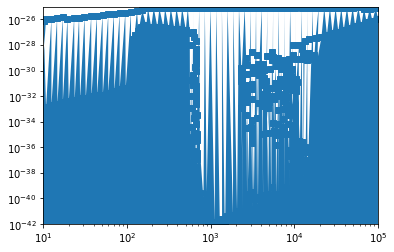

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull



df = pd.read_csv("./eff_gambit2.ecsv", header=None, usecols=[0,1], sep=' ')
mass = df[0]
sigmav = df[1]

fig = plt.figure()
ax= fig.add_subplot ( 111 )

ax.loglog(mass,sigmav,'s')
ax.set_ylim(1e-42,1e-25)
ax.set_xlim(10,1e5)
#ax.text(20, -200, 'HOW TO FILL HERE?', fontsize=30)

#plt.show()

#plt.loglog(mass,sigmav)
ax.fill_between(mass,sigmav,interpolate="True")

#pts = np.array(df)
#hull = ConvexHull(pts)
#plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],'red',alpha=0.5)
#plt.show()

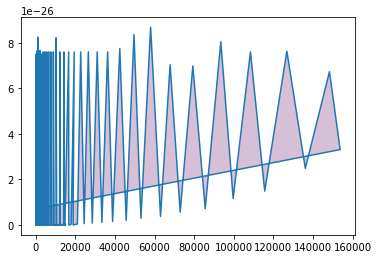

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 362004531  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 1.5e+05  Error-roundoff 1e-10  _one-merge 5.2e-10
  _near-inside 2.6e-09  Visible-distance 2.1e-10  U-max-coplanar 2.1e-10
  Width-outside 4.1e-10  _wide-facet 1.2e-09  _maxoutside 6.2e-10

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p140(v3): 9.9e+02 8.3e-26
- p372(v2): 1.5e+05 3.3e-26
- p0(v1):   5.7 7e-27

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 1e-10.  The center point, facets and distances
to the center point are as follows:

center point 5.157e+04 4.089e-26

facet p372 p0 distance= 2.5e-26
facet p140 p0 distance= 3.9e-24
facet p140 p372 distance= 2.5e-26

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:     5.673  1.537e+05  difference= 1.537e+05
  1:  9.738e-43  8.693e-26  difference= 8.693e-26

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 1e-10.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [66]:
from shapely.geometry import Polygon

pol = Polygon([[5.673, 6.959e-27],
[5.714, 9.338e-28],
[5.721, 9.158e-29],
[5.728, 9.335e-30],
[5.735, 9.231e-31],
[5.741, 9.410e-32],
[5.716, 6.582e-33],
[5.990, 3.815e-33],
[6.707, 7.366e-27],
[6.944, 3.322e-33],
[7.532, 6.305e-27],
[7.958, 1.975e-33],
[8.744, 6.783e-27],
[9.200, 1.301e-33],
[10.76, 1.081e-26],
[10.08, 7.194e-27],
[10.76, 1.293e-33],
[12.47, 1.039e-26],
[12.48, 1.847e-33],
[14.58, 1.211e-26],
[14.70, 2.439e-33],
[17.05, 1.466e-26],
[17.09, 3.512e-33],
[19.38, 1.159e-26],
[20.10, 3.825e-33],
[23.32, 1.298e-26],
[23.64, 4.594e-33],
[26.69, 1.391e-26],
[27.47, 6.840e-33],
[30.98, 1.531e-26],
[32.12, 6.951e-33],
[37.27, 1.731e-26],
[37.55, 9.535e-33],
[43.58, 1.956e-26],
[43.90, 1.224e-32],
[50.95, 2.155e-26],
[51.33, 1.294e-32],
[59.57, 2.400e-26],
[59.43, 1.805e-32],
[69.66, 2.674e-26],
[70.58, 2.368e-32],
[81.44, 2.905e-26],
[81.54, 3.461e-32],
[95.23, 3.245e-26],
[96.43, 4.498e-32],
[111.3, 3.779e-26],
[111.6, 7.930e-32],
[117.8, 2.937e-28],
[114.1, 1.099e-28],
[114.1, 5.626e-29],
[114.2, 2.880e-29],
[114.2, 1.474e-29],
[114.2, 7.543e-30],
[114.3, 3.861e-30],
[114.2, 2.000e-30],
[114.2, 1.024e-30],
[114.2, 5.272e-31],
[114.3, 2.463e-31],
[115.3, 1.501e-31],
[122.9, 5.841e-28],
[131.4, 4.867e-26],
[136.1, 1.208e-27],
[145.9, 2.550e-27],
[134.2, 5.354e-28],
[152.2, 5.258e-26],
[168.4, 3.740e-27],
[168.4, 1.712e-27],
[177.9, 7.465e-26],
[194.5, 2.500e-27],
[208.1, 7.505e-26],
[230.2, 2.669e-27],
[243.3, 7.202e-26],
[271.7, 2.400e-27],
[284.5, 7.194e-26],
[314.8, 1.989e-27],
[332.6, 7.424e-26],
[368.2, 1.789e-27],
[388.9, 7.424e-26],
[430.5, 1.887e-27],
[454.8, 7.383e-26],
[503.4, 1.464e-27],
[531.8, 7.408e-26],
[561.2, 9.345e-28],
[567.4, 2.206e-38],
[577.4, 1.783e-31],
[582.6, 1.231e-36],
[598.4, 9.084e-29],
[600.8, 1.034e-32],
[602.0, 1.080e-33],
[590.2, 3.585e-35],
[606.3, 6.642e-36],
[605.7, 4.745e-37],
[608.1, 7.421e-38],
[610.7, 6.825e-32],
[608.3, 3.086e-36],
[609.3, 2.397e-37],
[618.4, 4.536e-31],
[626.2, 1.281e-35],
[621.8, 7.465e-26],
[623.5, 4.485e-28],
[640.0, 4.724e-34],
[638.9, 1.825e-34],
[614.4, 1.072e-27],
[652.3, 2.721e-38],
[662.1, 9.098e-31],
[656.4, 1.906e-31],
[659.4, 4.794e-29],
[669.6, 2.966e-32],
[665.4, 6.939e-35],
[671.2, 1.119e-38],
[667.6, 1.947e-28],
[665.7, 2.327e-29],
[665.9, 1.191e-29],
[666.2, 6.096e-30],
[666.4, 3.120e-30],
[647.9, 1.888e-30],
[668.6, 5.564e-33],
[666.9, 2.215e-33],
[675.6, 4.413e-39],
[674.8, 1.993e-39],
[675.0, 1.020e-39],
[671.1, 4.998e-40],
[700.2, 1.229e-40],
[658.8, 1.585e-32],
[675.6, 1.304e-37],
[663.0, 6.530e-32],
[676.0, 3.726e-36],
[676.8, 3.436e-37],
[680.4, 1.165e-35],
[727.1, 7.654e-26],
[743.8, 2.534e-40],
[693.8, 3.580e-34],
[817.8, 8.177e-41],
[850.2, 7.654e-26],
[897.3, 4.096e-41],
[891.3, 1.720e-41],
[891.7, 8.803e-42],
[887.0, 4.050e-42],
[935.1, 1.791e-42],
[890.6, 8.505e-41],
[990.8, 8.257e-26],
[1111, 1.431e-42],
[1162, 7.654e-26],
[1284, 9.738e-43],
[1364, 2.320e-42],
[1359, 7.654e-26],
[1468, 9.839e-43],
[1568, 4.232e-42],
[1489, 1.919e-42],
[1589, 7.654e-26],
[1842, 5.253e-42],
[1858, 7.654e-26],
[2059, 1.047e-41],
[2173, 7.654e-26],
[2318, 1.518e-30],
[2325, 5.158e-31],
[2315, 2.310e-31],
[2363, 5.591e-32],
[2375, 3.335e-33],
[2322, 1.112e-33],
[2424, 9.756e-42],
[2316, 1.579e-31],
[2541, 7.511e-26],
[2645, 9.871e-30],
[2672, 2.877e-32],
[2673, 1.327e-32],
[2682, 6.166e-33],
[2659, 3.535e-34],
[2694, 3.458e-35],
[2711, 2.054e-40],
[2704, 2.826e-30],
[2673, 5.356e-31],
[2717, 3.476e-41],
[2748, 7.069e-32],
[2739, 3.356e-33],
[2850, 1.195e-40],
[2805, 1.388e-41],
[2971, 7.134e-26],
[3134, 1.620e-41],
[3099, 1.471e-34],
[3101, 1.845e-35],
[3077, 7.304e-36],
[3113, 2.793e-29],
[3113, 3.335e-32],
[3083, 6.247e-33],
[3048, 3.583e-35],
[3096, 2.116e-36],
[3137, 2.954e-40],
[3171, 1.889e-30],
[3194, 5.844e-31],
[3115, 8.202e-32],
[3273, 9.224e-41],
[3474, 7.582e-26],
[3578, 2.245e-41],
[3654, 3.037e-33],
[3540, 1.881e-34],
[3564, 1.773e-29],
[3768, 1.294e-40],
[3697, 3.108e-30],
[3677, 1.054e-30],
[3754, 4.316e-31],
[4062, 7.607e-26],
[4105, 7.797e-32],
[4109, 1.361e-32],
[4169, 1.159e-35],
[4222, 2.897e-41],
[4216, 4.026e-33],
[4238, 1.544e-33],
[4205, 7.665e-41],
[4291, 2.640e-31],
[4314, 2.018e-40],
[4172, 3.181e-30],
[4325, 1.185e-30],
[4704, 1.260e-29],
[4750, 7.607e-26],
[4594, 1.434e-31],
[4814, 4.543e-32],
[4720, 1.871e-32],
[4819, 6.994e-33],
[4768, 1.073e-33],
[4875, 1.348e-35],
[4693, 3.458e-41],
[4930, 3.713e-33],
[4692, 1.771e-33],
[4834, 2.328e-40],
[5103, 1.366e-30],
[5274, 6.306e-41],
[5382, 3.027e-29],
[5459, 6.979e-30],
[5475, 7.788e-35],
[5451, 7.391e-40],
[5501, 1.125e-29],
[5554, 7.607e-26],
[5545, 4.100e-32],
[5617, 9.572e-33],
[5722, 2.015e-35],
[5820, 1.148e-31],
[5650, 6.048e-33],
[5990, 2.171e-30],
[6013, 1.083e-40],
[6334, 2.053e-32],
[6304, 8.022e-34],
[6322, 8.549e-36],
[6280, 1.476e-36],
[6477, 3.451e-30],
[6345, 6.909e-35],
[6423, 2.411e-40],
[6396, 8.931e-30],
[6494, 7.607e-26],
[6603, 1.051e-32],
[6664, 1.548e-35],
[6685, 2.104e-31],
[6803, 5.952e-32],
[6914, 1.201e-30],
[7214, 4.490e-33],
[7244, 1.491e-34],
[7203, 3.683e-35],
[7374, 1.048e-33],
[7422, 1.069e-35],
[7296, 7.385e-40],
[7464, 2.840e-30],
[7584, 2.856e-40],
[7567, 7.257e-30],
[7594, 7.607e-26],
[7655, 1.485e-32],
[7834, 4.227e-31],
[7848, 1.351e-31],
[7919, 3.452e-32],
[8085, 1.195e-30],
[7996, 2.362e-33],
[8524, 8.835e-32],
[8308, 3.381e-34],
[8285, 6.024e-35],
[8106, 7.846e-33],
[8548, 6.376e-37],
[8536, 2.081e-37],
[8628, 3.731e-38],
[8590, 9.315e-34],
[8636, 1.091e-35],
[8677, 2.526e-30],
[8728, 4.515e-40],
[8713, 7.630e-30],
[8879, 7.607e-26],
[9194, 3.713e-31],
[9210, 1.495e-31],
[9218, 3.117e-32],
[9220, 1.354e-30],
[9566, 9.966e-29],
[9507, 1.718e-29],
[9356, 2.484e-35],
[9631, 3.959e-36],
[9674, 1.487e-36],
[9712, 1.093e-37],
[9796, 1.551e-38],
[9617, 5.243e-39],
[9683, 1.162e-39],
[9380, 4.806e-34],
[9998, 1.164e-31],
[9302, 5.260e-35],
[9850, 6.411e-37],
[1.000e+4, 2.387e-37],
[9641, 3.751e-38],
[9619, 3.579e-39],
[9356, 7.867e-34],
[1.042e+4, 7.434e-30],
[1.028e+4, 8.228e-26],
[1.045e+4, 2.348e-31],
[1.046e+4, 4.153e-32],
[1.039e+4, 2.302e-32],
[1.125e+4, 1.035e-28],
[1.129e+4, 3.031e-36],
[1.135e+4, 1.245e-36],
[1.137e+4, 1.115e-37],
[1.133e+4, 1.537e-39],
[1.083e+4, 1.295e-31],
[1.165e+4, 5.847e-37],
[1.158e+4, 2.592e-37],
[1.203e+4, 8.319e-30],
[1.214e+4, 7.607e-26],
[1.234e+4, 5.098e-29],
[1.278e+4, 2.194e-29],
[1.286e+4, 2.928e-38],
[1.284e+4, 3.550e-39],
[1.323e+4, 2.103e-28],
[1.218e+4, 9.441e-29],
[1.247e+4, 2.556e-36],
[1.322e+4, 1.001e-37],
[1.234e+4, 1.488e-39],
[1.335e+4, 9.932e-37],
[1.359e+4, 4.486e-37],
[1.411e+4, 8.787e-30],
[1.420e+4, 7.607e-26],
[1.424e+4, 6.443e-30],
[1.427e+4, 1.393e-38],
[1.432e+4, 5.915e-39],
[1.488e+4, 2.476e-29],
[1.444e+4, 5.377e-38],
[1.510e+4, 2.863e-28],
[1.440e+4, 8.620e-38],
[1.470e+4, 6.868e-37],
[1.660e+4, 7.607e-26],
[1.667e+4, 8.322e-30],
[1.733e+4, 1.640e-29],
[1.787e+4, 3.370e-28],
[1.941e+4, 7.607e-26],
[1.884e+4, 8.040e-30],
[2.102e+4, 4.080e-28],
[2.269e+4, 7.607e-26],
[2.443e+4, 5.898e-28],
[2.654e+4, 7.607e-26],
[2.853e+4, 7.913e-28],
[3.103e+4, 7.607e-26],
[3.339e+4, 1.106e-27],
[3.628e+4, 7.607e-26],
[3.880e+4, 1.491e-27],
[4.242e+4, 7.760e-26],
[4.564e+4, 1.994e-27],
[4.960e+4, 8.370e-26],
[5.310e+4, 2.938e-27],
[5.800e+4, 8.693e-26],
[6.299e+4, 3.747e-27],
[6.783e+4, 7.044e-26],
[7.292e+4, 5.682e-27],
[7.931e+4, 6.986e-26],
[8.556e+4, 7.113e-27],
[9.344e+4, 8.055e-26],
[9.966e+4, 1.165e-26],
[1.084e+5, 7.607e-26],
[1.156e+5, 1.486e-26],
[1.268e+5, 7.637e-26],
[1.361e+5, 2.481e-26],
[1.483e+5, 6.738e-26],
[1.537e+5, 3.313e-26]])
x, y = pol.exterior.xy

# PLot

plt.plot(x, y)

# Fill between

plt.fill_between(x, y, facecolor='thistle')

# Display

plt.show()


xx=[[5.673, 6.959e-27],
[5.714, 9.338e-28],
[5.721, 9.158e-29],
[5.728, 9.335e-30],
[5.735, 9.231e-31],
[5.741, 9.410e-32],
[5.716, 6.582e-33],
[5.990, 3.815e-33],
[6.707, 7.366e-27],
[6.944, 3.322e-33],
[7.532, 6.305e-27],
[7.958, 1.975e-33],
[8.744, 6.783e-27],
[9.200, 1.301e-33],
[10.76, 1.081e-26],
[10.08, 7.194e-27],
[10.76, 1.293e-33],
[12.47, 1.039e-26],
[12.48, 1.847e-33],
[14.58, 1.211e-26],
[14.70, 2.439e-33],
[17.05, 1.466e-26],
[17.09, 3.512e-33],
[19.38, 1.159e-26],
[20.10, 3.825e-33],
[23.32, 1.298e-26],
[23.64, 4.594e-33],
[26.69, 1.391e-26],
[27.47, 6.840e-33],
[30.98, 1.531e-26],
[32.12, 6.951e-33],
[37.27, 1.731e-26],
[37.55, 9.535e-33],
[43.58, 1.956e-26],
[43.90, 1.224e-32],
[50.95, 2.155e-26],
[51.33, 1.294e-32],
[59.57, 2.400e-26],
[59.43, 1.805e-32],
[69.66, 2.674e-26],
[70.58, 2.368e-32],
[81.44, 2.905e-26],
[81.54, 3.461e-32],
[95.23, 3.245e-26],
[96.43, 4.498e-32],
[111.3, 3.779e-26],
[111.6, 7.930e-32],
[117.8, 2.937e-28],
[114.1, 1.099e-28],
[114.1, 5.626e-29],
[114.2, 2.880e-29],
[114.2, 1.474e-29],
[114.2, 7.543e-30],
[114.3, 3.861e-30],
[114.2, 2.000e-30],
[114.2, 1.024e-30],
[114.2, 5.272e-31],
[114.3, 2.463e-31],
[115.3, 1.501e-31],
[122.9, 5.841e-28],
[131.4, 4.867e-26],
[136.1, 1.208e-27],
[145.9, 2.550e-27],
[134.2, 5.354e-28],
[152.2, 5.258e-26],
[168.4, 3.740e-27],
[168.4, 1.712e-27],
[177.9, 7.465e-26],
[194.5, 2.500e-27],
[208.1, 7.505e-26],
[230.2, 2.669e-27],
[243.3, 7.202e-26],
[271.7, 2.400e-27],
[284.5, 7.194e-26],
[314.8, 1.989e-27],
[332.6, 7.424e-26],
[368.2, 1.789e-27],
[388.9, 7.424e-26],
[430.5, 1.887e-27],
[454.8, 7.383e-26],
[503.4, 1.464e-27],
[531.8, 7.408e-26],
[561.2, 9.345e-28],
[567.4, 2.206e-38],
[577.4, 1.783e-31],
[582.6, 1.231e-36],
[598.4, 9.084e-29],
[600.8, 1.034e-32],
[602.0, 1.080e-33],
[590.2, 3.585e-35],
[606.3, 6.642e-36],
[605.7, 4.745e-37],
[608.1, 7.421e-38],
[610.7, 6.825e-32],
[608.3, 3.086e-36],
[609.3, 2.397e-37],
[618.4, 4.536e-31],
[626.2, 1.281e-35],
[621.8, 7.465e-26],
[623.5, 4.485e-28],
[640.0, 4.724e-34],
[638.9, 1.825e-34],
[614.4, 1.072e-27],
[652.3, 2.721e-38],
[662.1, 9.098e-31],
[656.4, 1.906e-31],
[659.4, 4.794e-29],
[669.6, 2.966e-32],
[665.4, 6.939e-35],
[671.2, 1.119e-38],
[667.6, 1.947e-28],
[665.7, 2.327e-29],
[665.9, 1.191e-29],
[666.2, 6.096e-30],
[666.4, 3.120e-30],
[647.9, 1.888e-30],
[668.6, 5.564e-33],
[666.9, 2.215e-33],
[675.6, 4.413e-39],
[674.8, 1.993e-39],
[675.0, 1.020e-39],
[671.1, 4.998e-40],
[700.2, 1.229e-40],
[658.8, 1.585e-32],
[675.6, 1.304e-37],
[663.0, 6.530e-32],
[676.0, 3.726e-36],
[676.8, 3.436e-37],
[680.4, 1.165e-35],
[727.1, 7.654e-26],
[743.8, 2.534e-40],
[693.8, 3.580e-34],
[817.8, 8.177e-41],
[850.2, 7.654e-26],
[897.3, 4.096e-41],
[891.3, 1.720e-41],
[891.7, 8.803e-42],
[887.0, 4.050e-42],
[935.1, 1.791e-42],
[890.6, 8.505e-41],
[990.8, 8.257e-26],
[1111, 1.431e-42],
[1162, 7.654e-26],
[1284, 9.738e-43],
[1364, 2.320e-42],
[1359, 7.654e-26],
[1468, 9.839e-43],
[1568, 4.232e-42],
[1489, 1.919e-42],
[1589, 7.654e-26],
[1842, 5.253e-42],
[1858, 7.654e-26],
[2059, 1.047e-41],
[2173, 7.654e-26],
[2318, 1.518e-30],
[2325, 5.158e-31],
[2315, 2.310e-31],
[2363, 5.591e-32],
[2375, 3.335e-33],
[2322, 1.112e-33],
[2424, 9.756e-42],
[2316, 1.579e-31],
[2541, 7.511e-26],
[2645, 9.871e-30],
[2672, 2.877e-32],
[2673, 1.327e-32],
[2682, 6.166e-33],
[2659, 3.535e-34],
[2694, 3.458e-35],
[2711, 2.054e-40],
[2704, 2.826e-30],
[2673, 5.356e-31],
[2717, 3.476e-41],
[2748, 7.069e-32],
[2739, 3.356e-33],
[2850, 1.195e-40],
[2805, 1.388e-41],
[2971, 7.134e-26],
[3134, 1.620e-41],
[3099, 1.471e-34],
[3101, 1.845e-35],
[3077, 7.304e-36],
[3113, 2.793e-29],
[3113, 3.335e-32],
[3083, 6.247e-33],
[3048, 3.583e-35],
[3096, 2.116e-36],
[3137, 2.954e-40],
[3171, 1.889e-30],
[3194, 5.844e-31],
[3115, 8.202e-32],
[3273, 9.224e-41],
[3474, 7.582e-26],
[3578, 2.245e-41],
[3654, 3.037e-33],
[3540, 1.881e-34],
[3564, 1.773e-29],
[3768, 1.294e-40],
[3697, 3.108e-30],
[3677, 1.054e-30],
[3754, 4.316e-31],
[4062, 7.607e-26],
[4105, 7.797e-32],
[4109, 1.361e-32],
[4169, 1.159e-35],
[4222, 2.897e-41],
[4216, 4.026e-33],
[4238, 1.544e-33],
[4205, 7.665e-41],
[4291, 2.640e-31],
[4314, 2.018e-40],
[4172, 3.181e-30],
[4325, 1.185e-30],
[4704, 1.260e-29],
[4750, 7.607e-26],
[4594, 1.434e-31],
[4814, 4.543e-32],
[4720, 1.871e-32],
[4819, 6.994e-33],
[4768, 1.073e-33],
[4875, 1.348e-35],
[4693, 3.458e-41],
[4930, 3.713e-33],
[4692, 1.771e-33],
[4834, 2.328e-40],
[5103, 1.366e-30],
[5274, 6.306e-41],
[5382, 3.027e-29],
[5459, 6.979e-30],
[5475, 7.788e-35],
[5451, 7.391e-40],
[5501, 1.125e-29],
[5554, 7.607e-26],
[5545, 4.100e-32],
[5617, 9.572e-33],
[5722, 2.015e-35],
[5820, 1.148e-31],
[5650, 6.048e-33],
[5990, 2.171e-30],
[6013, 1.083e-40],
[6334, 2.053e-32],
[6304, 8.022e-34],
[6322, 8.549e-36],
[6280, 1.476e-36],
[6477, 3.451e-30],
[6345, 6.909e-35],
[6423, 2.411e-40],
[6396, 8.931e-30],
[6494, 7.607e-26],
[6603, 1.051e-32],
[6664, 1.548e-35],
[6685, 2.104e-31],
[6803, 5.952e-32],
[6914, 1.201e-30],
[7214, 4.490e-33],
[7244, 1.491e-34],
[7203, 3.683e-35],
[7374, 1.048e-33],
[7422, 1.069e-35],
[7296, 7.385e-40],
[7464, 2.840e-30],
[7584, 2.856e-40],
[7567, 7.257e-30],
[7594, 7.607e-26],
[7655, 1.485e-32],
[7834, 4.227e-31],
[7848, 1.351e-31],
[7919, 3.452e-32],
[8085, 1.195e-30],
[7996, 2.362e-33],
[8524, 8.835e-32],
[8308, 3.381e-34],
[8285, 6.024e-35],
[8106, 7.846e-33],
[8548, 6.376e-37],
[8536, 2.081e-37],
[8628, 3.731e-38],
[8590, 9.315e-34],
[8636, 1.091e-35],
[8677, 2.526e-30],
[8728, 4.515e-40],
[8713, 7.630e-30],
[8879, 7.607e-26],
[9194, 3.713e-31],
[9210, 1.495e-31],
[9218, 3.117e-32],
[9220, 1.354e-30],
[9566, 9.966e-29],
[9507, 1.718e-29],
[9356, 2.484e-35],
[9631, 3.959e-36],
[9674, 1.487e-36],
[9712, 1.093e-37],
[9796, 1.551e-38],
[9617, 5.243e-39],
[9683, 1.162e-39],
[9380, 4.806e-34],
[9998, 1.164e-31],
[9302, 5.260e-35],
[9850, 6.411e-37],
[1.000e+4, 2.387e-37],
[9641, 3.751e-38],
[9619, 3.579e-39],
[9356, 7.867e-34],
[1.042e+4, 7.434e-30],
[1.028e+4, 8.228e-26],
[1.045e+4, 2.348e-31],
[1.046e+4, 4.153e-32],
[1.039e+4, 2.302e-32],
[1.125e+4, 1.035e-28],
[1.129e+4, 3.031e-36],
[1.135e+4, 1.245e-36],
[1.137e+4, 1.115e-37],
[1.133e+4, 1.537e-39],
[1.083e+4, 1.295e-31],
[1.165e+4, 5.847e-37],
[1.158e+4, 2.592e-37],
[1.203e+4, 8.319e-30],
[1.214e+4, 7.607e-26],
[1.234e+4, 5.098e-29],
[1.278e+4, 2.194e-29],
[1.286e+4, 2.928e-38],
[1.284e+4, 3.550e-39],
[1.323e+4, 2.103e-28],
[1.218e+4, 9.441e-29],
[1.247e+4, 2.556e-36],
[1.322e+4, 1.001e-37],
[1.234e+4, 1.488e-39],
[1.335e+4, 9.932e-37],
[1.359e+4, 4.486e-37],
[1.411e+4, 8.787e-30],
[1.420e+4, 7.607e-26],
[1.424e+4, 6.443e-30],
[1.427e+4, 1.393e-38],
[1.432e+4, 5.915e-39],
[1.488e+4, 2.476e-29],
[1.444e+4, 5.377e-38],
[1.510e+4, 2.863e-28],
[1.440e+4, 8.620e-38],
[1.470e+4, 6.868e-37],
[1.660e+4, 7.607e-26],
[1.667e+4, 8.322e-30],
[1.733e+4, 1.640e-29],
[1.787e+4, 3.370e-28],
[1.941e+4, 7.607e-26],
[1.884e+4, 8.040e-30],
[2.102e+4, 4.080e-28],
[2.269e+4, 7.607e-26],
[2.443e+4, 5.898e-28],
[2.654e+4, 7.607e-26],
[2.853e+4, 7.913e-28],
[3.103e+4, 7.607e-26],
[3.339e+4, 1.106e-27],
[3.628e+4, 7.607e-26],
[3.880e+4, 1.491e-27],
[4.242e+4, 7.760e-26],
[4.564e+4, 1.994e-27],
[4.960e+4, 8.370e-26],
[5.310e+4, 2.938e-27],
[5.800e+4, 8.693e-26],
[6.299e+4, 3.747e-27],
[6.783e+4, 7.044e-26],
[7.292e+4, 5.682e-27],
[7.931e+4, 6.986e-26],
[8.556e+4, 7.113e-27],
[9.344e+4, 8.055e-26],
[9.966e+4, 1.165e-26],
[1.084e+5, 7.607e-26],
[1.156e+5, 1.486e-26],
[1.268e+5, 7.637e-26],
[1.361e+5, 2.481e-26],
[1.483e+5, 6.738e-26],
[1.537e+5, 3.313e-26]]

pts = np.array(xx)
hull = ConvexHull(pts)
#plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],'red',alpha=0.5)
#plt.show()

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

pts1 = [[0.0, 10.0], [0.0, 20.0], [10.0, 0.0], [20.0, 0.0]]

pts = np.array(pts1)

hull = ConvexHull(pts)

plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],'red',alpha=0.5)
plt.show()



In [ ]:
inst_list = list(instrument_dict.values())
inst_list.append('all')

channel_list = list(channel_dict.keys())
channel_list.append('all')

In [ ]:
def filter_list(Mode, Instrument, Channel):
    
    metadata_filtered_df = pd.DataFrame()
    
    if Mode == 'all':
        metadata_filtered_df =  metadata_df
    else:
        metadata_filtered_df = metadata_df.loc[metadata_df['Mode'] == Mode[:3]]

    if Instrument == 'all':
        metadata_filtered_df =  metadata_filtered_df
    else:
        inst_key = get_key_from_value(instrument_dict, Instrument)[0]
        if inst_key == 'multi-inst':
            metadata_filtered_df = metadata_filtered_df.loc[metadata_filtered_df['Instrument'].apply(type) == list]
        else:
            metadata_filtered_df = metadata_filtered_df.loc[metadata_filtered_df['Instrument'] == inst_key]

    if Channel == 'all':
        metadata_filtered_df =  metadata_filtered_df
    else:
        metadata_filtered_df = metadata_filtered_df.loc[metadata_filtered_df['Channel'] == Channel]
        
    print("\n" + str(len(metadata_filtered_df)) + " data sets found. Please select sets to plot:")
    
    labels = []
    
    for index, row in metadata_filtered_df.iterrows():
        label_str = ''
        label_str += get_names_str(row['Instrument'], instrument_dict)
        label_str += ' (' + row['Year'] + '): ' + get_names_str(row['Target'], target_dict) + ', ' + row['Channel'] 
        if row['Comment'] != '':
            label_str += ', ' + row['Comment']
        labels.append(label_str)
    
    
    checkboxes = [widgets.Checkbox(value=False, description=label, layout=widgets.Layout(width='100%', flex_flow='wrap')) for label in labels]
    output = widgets.VBox(children=checkboxes)
    display(output)

    #metadata_filtered_df = metadata_filtered_df.loc[[k.value for k in checkboxes]]
    return metadata_filtered_df, checkboxes

def filter_list_interactive():
    return interactive(filter_list, Mode=['annihilation', 'decay', 'all'], Instrument=inst_list, Channel=channel_list)


In [ ]:
filter_widget = filter_list_interactive()
display(filter_widget)

Now execute next cell to create the plot:

In [ ]:
metadata_filtered_df = filter_widget.result[0].loc[[k.value for k in filter_widget.result[1]]]

data_raw_vec = []
labels_plot = []
labels_plot_short = []
xmin = 1e6*u.TeV
xmax = 1e-6*u.TeV

ymin = 1e-27
ymax = 5e-20

for index, row in metadata_filtered_df.iterrows():
    data_raw = ascii.read(row['File name'])
    if row['Mode'] == 'ann':
        yaxis = 'sigmav'
    else:
        yaxis = 'tau'
    data_raw_vec.append([data_raw['mass'], data_raw[yaxis]])
    if min(data_raw['mass'].to('TeV')) < xmin: xmin = min(data_raw['mass'].to('TeV'))
    if max(data_raw['mass'].to('TeV')) > xmax: xmax = max(data_raw['mass'].to('TeV'))

    label_str = r''
    label_str += get_names_str(row['Instrument'], instrument_dict)
    label_str += ' (' + row['Year'] + ')'
    labels_plot_short.append(label_str)
    label_str += ': ' + get_names_str(row['Target'], target_dict) + ', $' + get_names_str(row['Channel'], channel_dict) + '$'
    labels_plot.append(label_str)
                
xmin /= 2
xmax *= 2
x_grid = make_grid(xmin, xmax, npoints=2000, unit=style.energy_unit, log=True)
n_plot =  len(data_raw_vec)

data_to_plot = []
for index in range(n_plot):

    data_gridded = data_on_grid(data_raw_vec[index][0], data_raw_vec[index][1], x_grid, interpolation_kind='quadratic', fill_value = 1e40)
    data_to_plot.append(data_gridded)
    
envelope= []
for i in range(len(x_grid)):
    minvals = []
    for j in range(len(data_to_plot)):
        val = data_to_plot[j][i].value
        if np.isnan(val): val =1e40
        minvals.append(val)
    envelope.append(0.95*min(minvals))

plot_limits = plt.figure(figsize=(style.figwidth, style.figheight))


random_order = list(range(n_plot))
random.shuffle(random_order)

for j in range(n_plot):
    
    
    plt.plot(x_grid, data_to_plot[j], label=labels_plot[j], color=style.colors[random_order[j]])
    plt.fill_between(x_grid.value, data_to_plot[j].value, np.ones(len(x_grid)), alpha=0.1, color=style.colors[random_order[j]])
    if style.legend == 'fancy':  
        i_legend = next(x[0] for x in enumerate(data_to_plot[j].value) if x[1] < 1e40)
        plt.text(x_grid[i_legend].value, 0.9*ymax,  labels_plot_short[j], horizontalalignment='right', verticalalignment='top', snap=True, color=style.colors[random_order[j]], rotation=90)
    
plt.plot(x_grid, envelope, linewidth=5, color='k', alpha=0.2)

if style.legend == 'side':
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", frameon=style.frameon)


wimp_model = ascii.read("modelpredictions/wimp_steigman2012_numerical.ecsv")
plt.text(wimp_model["mass"].to(style.energy_unit)[-1].value, wimp_model["sigmav"][-1],  "Steigman et al. (2012) thermal WIMP prediction", horizontalalignment='right', verticalalignment='bottom', snap=True, color='k', alpha=0.3)
wimp_model_gridded = data_on_grid(wimp_model["mass"], wimp_model["sigmav"], x_grid, interpolation_kind='quadratic', fill_value = 1e-40)

plt.fill_between(x_grid.value, np.zeros(2000), wimp_model_gridded.value, color='k', alpha=0.1)


plt.xscale('log')
plt.yscale('log')
plt.ylim([ymin, ymax])
plt.xlim([xmin.to(style.energy_unit).value, xmax.to(style.energy_unit).value]);

plt.xlabel(r'$m_{\mathrm{DM}}$ $\mathrm{[' +style.energy_unit + ']}$');
plt.ylabel(r'$\langle\sigma v \rangle$ $[\mathrm{cm^3\,s^{-1}}]$');

In [ ]:
png_name = "limits.png"
plot_limits.savefig(png_name, format='png', dpi=300, bbox_inches="tight")